# Thompson Sampling Demo

Outline:
- 3-arm bandit
- Randomly generate the three payout probabilities
- Step through samples in ipython notebook
- Show choice, distributions, and payout after each sample (and sampled values on distribution before)

In [1]:
# Set up the notebook

# Module imports
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# inline plot setup
%matplotlib inline
distribution_support = np.linspace(0, 1, 100)

def preplot(knowledge, samples):
    '''Show existing 'prior' distributions with sample values and expectations'''
    plt.figure(figsize=(20, 20//len(knowledge)))
    for i, k in enumerate(knowledge):
        distribution = beta.pdf(distribution_support, *k)
        limit = max(distribution)*1.1

        plt.subplot(1, len(knowledge), i + 1)
        plt.plot(distribution_support, distribution, color = 'b', label = 'pdf')
        plt.vlines(k[0]/(k[0]+k[1]), 0, limit, colors='k', label='expectation')
        plt.vlines(samples[i], 0, limit, colors='y', label = 'sample')
        plt.xlim(0, 1)
        plt.ylim(0, limit)
        plt.legend()
    plt.tight_layout()

def postplot(knowledge):
    '''Show new distributions with expectations'''
    plt.figure(figsize=(20, 20//len(knowledge)))
    for i, k in enumerate(knowledge):
        distribution = beta.pdf(distribution_support, *k)
        limit = max(distribution)*1.1

        plt.subplot(1, len(knowledge), i + 1)
        plt.plot(distribution_support, distribution, color = 'b', label = 'pdf')
        plt.vlines(k[0]/(k[0]+k[1]), 0, limit, colors='k', label='expectation')
        plt.xlim(0, 1)
        plt.ylim(0, limit)
        plt.legend()
    plt.tight_layout()

# Bandit Arm class
class BanditArm(object):
    def __init__(self, pay_prob):
        self.pay_prob = pay_prob
    
    def __repr__(self):
        return 'Bandit Arm({})'.format(self.pay_prob)
    
    def __str__(self):
        return str(self.pay_prob)
        
    def pull(self):
        return np.random.binomial(1, self.pay_prob)

## Create Multi-Arm Bandit Problem

In [3]:
# Settings for problem
n_arms = 3

# Generate arms with payout probability
multi_arm_bandit = [
    BanditArm(*np.random.rand(1)) for _ in range(n_arms)
]

# Show results
print(multi_arm_bandit)
print('Arm {} is best arm.'.format(np.argmax([arm.pay_prob for arm in multi_arm_bandit])))

[Bandit Arm(0.5683114209693917), Bandit Arm(0.0725771372445495), Bandit Arm(0.48491332038616086)]
Arm 0 is best arm.


## Initialize Thompson Sampling State

In [4]:
# Choose the uniform prior parameter value
prior = 1

# Create beta-distribution parameter set
knowledge = [
    (prior, prior) for _ in multi_arm_bandit
]

# track number of samples taken
ns = 0

## Run one iteration of Thompson Sampling

Pulled arm 2
No payout


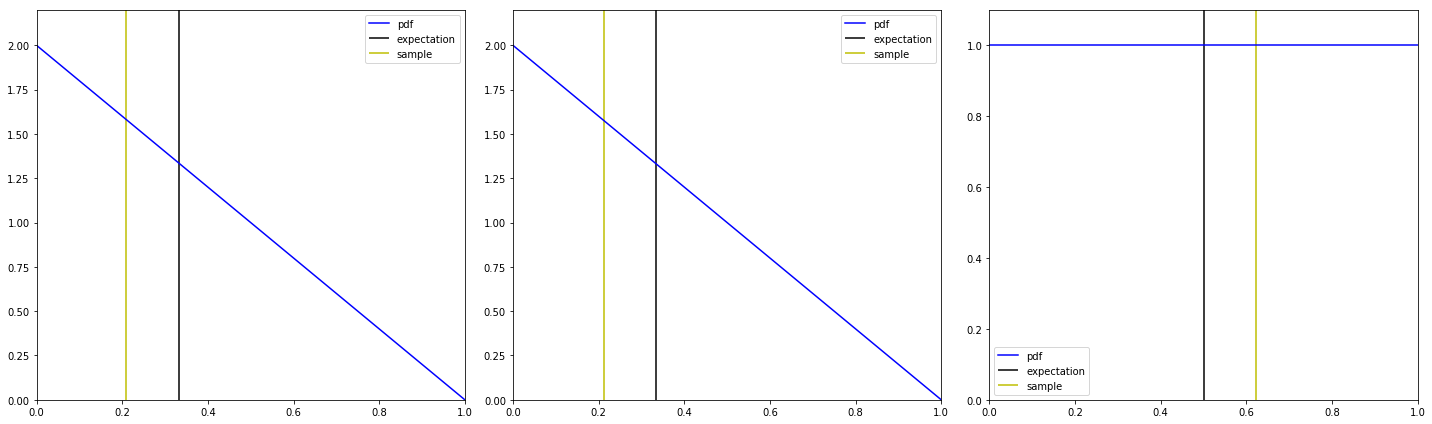

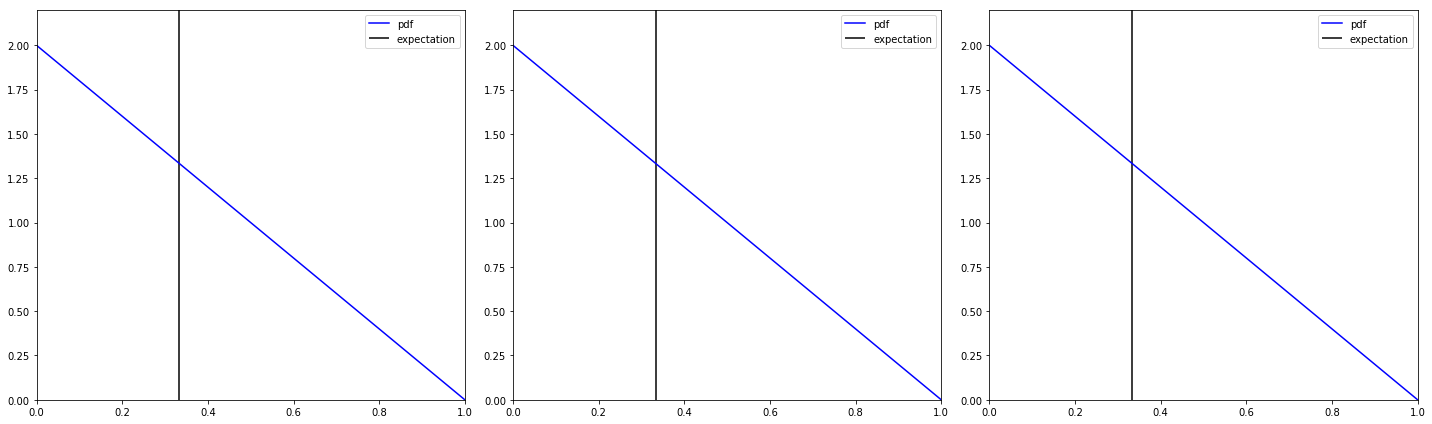

In [7]:
# Sample distributions
samples = [np.random.beta(a, b) for a, b in knowledge]
# Print samples, chosen arm, and result of pull
preplot(knowledge, samples)
choice = np.argmax(samples)
result = multi_arm_bandit[choice].pull()
print('Pulled arm', choice)
print('Payout' if result == 1 else 'No payout')
# update knowledge
knowledge[choice] = (knowledge[choice][0] + result), (knowledge[choice][1] + 1 - result)
ns += 1
postplot(knowledge)

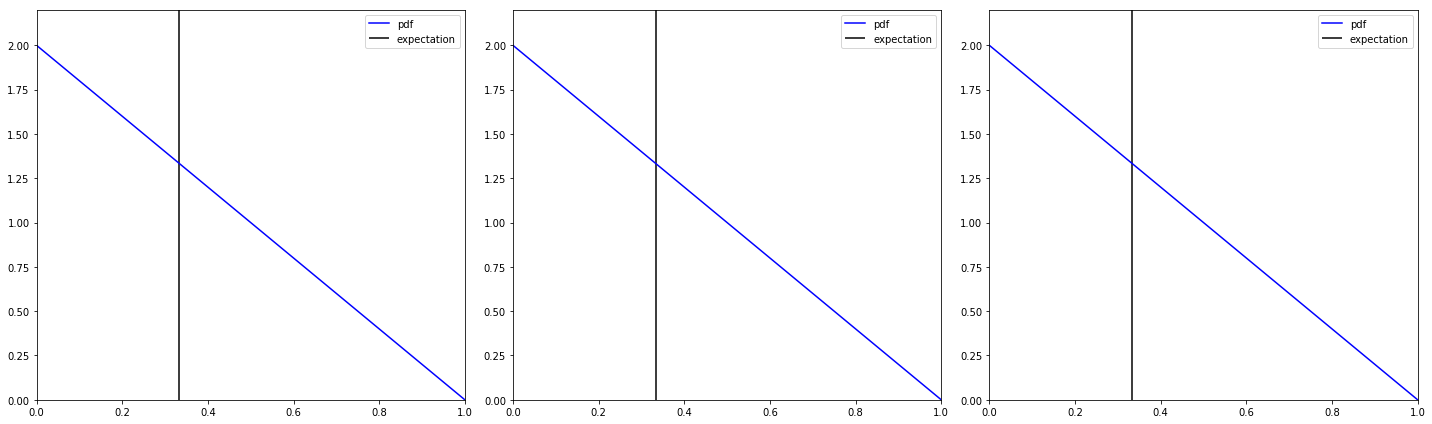

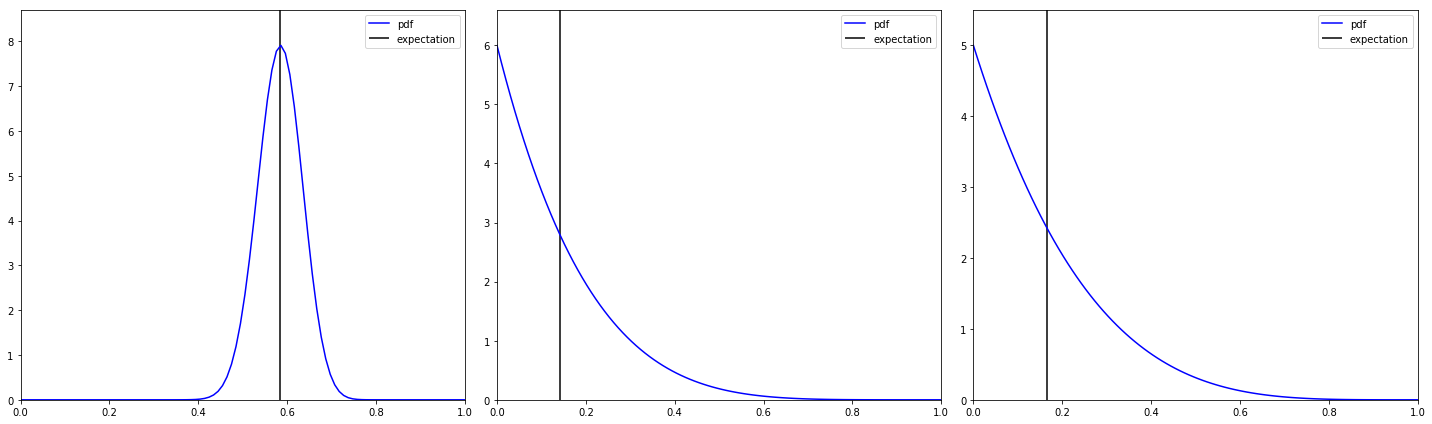

In [8]:
# sample 100 times
postplot(knowledge)
for _ in range(100):
    choice = np.argmax([np.random.beta(a, b) for a, b in knowledge])
    result = multi_arm_bandit[choice].pull()
    # update knowledge
    knowledge[choice] = (knowledge[choice][0] + result), (knowledge[choice][1] + 1 - result)
    ns += 1
postplot(knowledge)